# Employee Salary Prediction Model

In [9]:
#imports
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Data Import and Improvisation

In [10]:
df = pd.read_csv("../data/realistic_employee_dataset.csv")
df.head()

,Name,Age,Gender,Education,Job Title,Experience,Employment Type,Industry,Location,Weekly Hours,Remote Work,Certifications,Salary
0,Anika Bajwa,27,Female,Bachelor's,Data Scientist,5,Full-time,E-commerce,Hyderabad,38,No,5,25.26
1,Mitali Loke,31,Male,PhD,Data Analyst,1,Full-time,Consulting,Chennai,39,Yes,2,13.39
2,Chandani Shankar,28,Male,Bachelor's,IT Support Intern,1,Internship,Healthcare,Delhi,27,No,1,2.41
3,Adya Jayaraman,25,Female,Bachelor's,Cyber Security Analyst,2,Full-time,Finance,Chennai,41,No,5,11.96
4,Meghana Bhavsar,31,Male,Master's,Business Analyst,6,Contract,Consulting,Bangalore,39,No,3,21.04


In [11]:
df.isnull().sum()

Name               0
Age                0
Gender             0
Education          0
Job Title          0
Experience         0
Employment Type    0
Industry           0
Location           0
Weekly Hours       0
Remote Work        0
Certifications     0
Salary             0
dtype: int64

In [12]:
df.dtypes

Name                object
Age                  int64
Gender              object
Education           object
Job Title           object
Experience           int64
Employment Type     object
Industry            object
Location            object
Weekly Hours         int64
Remote Work         object
Certifications       int64
Salary             float64
dtype: object

## Datatype Coversion

### Categorical conversion

In [16]:
X = df.drop(["Salary","Name"], axis=1)
Y = df["Salary"]

onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

categorical_features = ["Gender","Education","Job Title","Employment Type","Industry","Location","Remote Work",]

transform = ColumnTransformer(transformers = [("onehot",onehot,categorical_features)], remainder = "passthrough")

transformed_X = transform.fit_transform(X)


## Training & Testing 

In [17]:
x_train,x_test,y_train,y_test = train_test_split(transformed_X,Y,test_size = .2, random_state = 42)

cf = RandomForestRegressor()

# cross_validation
cv_score = cross_val_score(cf,x_train,y_train,cv=5,scoring="r2")
print(f"Cross-Validation R2 Scores : {cv_score}")
print(f"Mean Cross-Validation R2: {cv_score.mean()}")

# Train_test_split
cf.fit(x_train,y_train)

print(f"Test set R2: {cf.score(x_test,y_test):.2f}")

Cross-Validation R2 Scores : [0.85711185 0.85270951 0.87097239 0.86429909 0.86701757]
Mean Cross-Validation R2: 0.8624220809703983
Test set R2: 0.87


## Model export

In [18]:
# Model export
joblib.dump(cf,"salary_prediction_model.pkl")
# Preprocessor export
joblib.dump(transform,"salary_preprocessor.pkl")

['salary_preprocessor.pkl']

## Visualization

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Education", "Job Title", "Experience", "Employment Type", "Industry", "Location"]
numeric_features = ["Age"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)
X_transformed = preprocessor.fit_transform(df)



In [26]:
import numpy as np

In [27]:
# Get OneHotEncoder from ColumnTransformer
ohe = preprocessor.named_transformers_["cat"]

# Get one-hot encoded feature names
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Combine with numeric columns
all_feature_names = np.concatenate([ohe_feature_names, numeric_features])


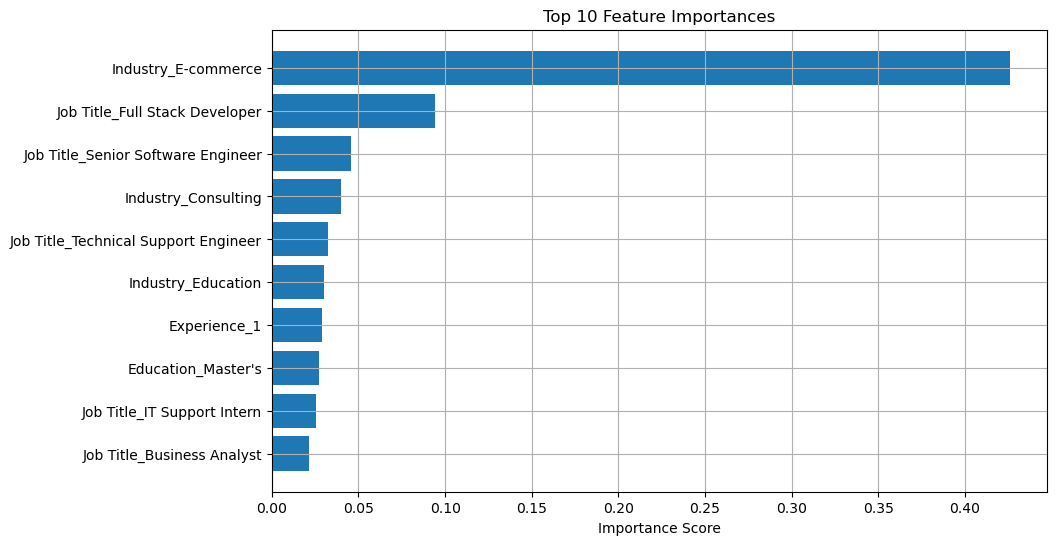

In [28]:
importances = cf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10

# Use feature names instead of index numbers
top_features = [all_feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), top_features)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.grid(True)
plt.show()


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)

# You can use the best model directly:
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Best CV R² Score: 0.8637774192939229


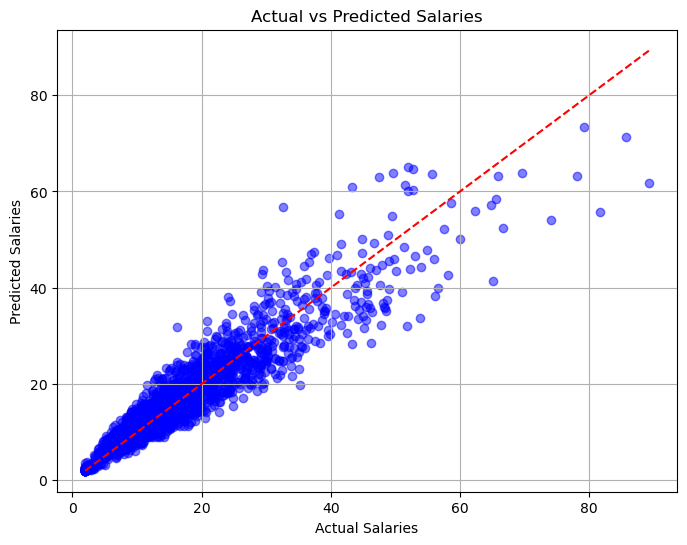

In [30]:
import matplotlib.pyplot as plt

y_pred = cf.predict(x_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs Predicted Salaries")
plt.grid(True)
plt.show()
